In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.DataFrame()
def read_data():
    df = pd.read_csv('source_data.csv')
    return df
df=read_data()
df_names=pd.read_csv('names.csv')
df.columns

Index(['Station code', 'Name of the station', 'srcYear', 'srcStateName',
       'Minimum temperature for river water',
       'Maximum temperature for river water',
       'Minimum value of dissolved oxygen',
       'Maximum value of dissolved oxygen',
       'Minimum potential of Hydrogen value in river water',
       'Maximum potential of Hydrogen value in river water',
       'Minimum Conductivity Level', 'Maximum Conductivity Level',
       'Minimum Biochemical oxygen demand',
       'Maximum Biochemical oxygen demand',
       'Minimum of Nitrate N + Nitrite N required for river water',
       'Maximum of Nitrate N + Nitrite N required for river water',
       'Minimum of Faecal Coliforms required for river water',
       'Maximum  of Faecal Coliforms required for river water',
       'Minimum coliform required for river water',
       'Maximum coliform required for river water', 'YearCode', 'Year'],
      dtype='object')

In [4]:
# create a dictionay of Station code as key and Name of river as value from df_names dataframe
river_names=dict(zip(df_names['Station code'],df_names['Name of river']))

# Now create a new column in df data frame with name of river using the above dictionary
df['Name of river']=df['Station code'].map(river_names)



Renaming the column names


In [5]:
df.rename(columns={'Minimum temperature for river water':'MIN_T',
       'Maximum temperature for river water':'MAX_T',
       'Minimum value of dissolved oxygen':'MIN_O',
       'Maximum value of dissolved oxygen':'MAX_O',
       'Minimum potential of Hydrogen value in river water':'MIN_H',
       'Maximum potential of Hydrogen value in river water':'MAX_H',
       'Minimum Conductivity Level':'MIN_C', 'Maximum Conductivity Level':'MAX_C',
       'Minimum Biochemical oxygen demand':'MIN_B',
       'Maximum Biochemical oxygen demand':'MAX_B',
       'Minimum of Nitrate N + Nitrite N required for river water':'MIN_N',
       'Maximum of Nitrate N + Nitrite N required for river water':'MAX_N',
       'Minimum of Faecal Coliforms required for river water':'MIN_F',
       'Maximum  of Faecal Coliforms required for river water':'MAX_F',
       'Minimum coliform required for river water':'MIN_CO',
       'Maximum coliform required for river water':'MAX_CO'}, inplace=True)

In [6]:
df=df.drop_duplicates(subset=['Station code','srcYear'],keep='first').reset_index(drop=True)

# dropping columns like YearCode and Year
df.drop(['YearCode','Year'], axis =1,inplace=True)
df=df.dropna()

In [7]:
# # Group by 'Station code' and calculate the range for columns 'A' and 'B'
# df1 = df.groupby('Station code')['MIN_CO','MAX_CO'].agg(lambda x: x.max() - x.min())

# # print the station codes of all rows where the range of A or B is greater than 20000
# # print(df1[(df1['A']>200000) | (df1['B']>200000)].index)

# # if the range of A or B is greater than 20000, drop the row
# df1=df1[(df1['MIN_CO']<200000) & (df1['MAX_CO']<200000)]

# # keep the rows of data frame df where station code is index of df1
# df=df[df['Station code'].isin(df1.index)]

Filtering column Maximum colioform count, minimum colioform count corrected automatically

In [8]:
# # print all Station codes where A is greater than 5*10^6
# # print(df[df['MIN_CO']>200000]['Station code'].unique())
# # 1483 1478
# # print(df[df['Station code']==10106]['MIN_CO'].value_counts())

# # drop rows corresponding to Station code where A column is more than 1e6
# df=df.loc[(df['Station code']!=1478) & 
#           (df['Station code']!=1483) & (df['Station code']!=4404) & (df['Station code']!=1480) & (df['Station code']!=10103)]


Filtering for max and minimum nitrates

In [9]:
df=df[df['MAX_N']<150]
df=df[df['MIN_N']<15]


Filtering the databased on Carbon potential

In [10]:
df=df.loc[(df['Station code']!=1326) & (df['Station code']!=2360)]


Filtering the data for dissolved oxygen levels

In [11]:
# df[df['MAX_O']>40]['Station code']
#  2182 2773 1848 2017
# df[df['Station code']==3124]

# compute the mean of all columns corresponding to station code 2182 excluding the srcYear 2012
# df.loc[(df['Station code']==1848) & (df['srcYear']!=2014)].mean()

# fill the value 6.0 in place of MAX_O for station code 2182 and srcYear 2012
df.loc[(df['Station code']==2182) & (df['srcYear']==2012),'MAX_O']=6.0
df.loc[(df['Station code']==2773) & (df['srcYear']==2012),'MAX_O']=8.4
df.loc[(df['Station code']==3124) & (df['srcYear']==2014),'MAX_O']=9.5



Filtering data for maximum hydrogen potential

In [12]:
# sns.boxplot(x=df['MAX_H'])
df[df['MAX_H']>60]['Station code']
# 1361 1184 1091

# df[df['Station code']==1091]
df.loc[(df['Station code']==1361) & (df['srcYear']==2014),'MAX_H']=8.2
df.loc[(df['Station code']==1184) & (df['srcYear']==2014),'MAX_H']=8.4
df.loc[(df['Station code']==1091) & (df['srcYear']==2014),'MAX_H']=7.5




Filtering data for minimum hydrogen potential

In [13]:
# df[df['MIN_H']<0.5]['Station code']
# 1272 2622 10
# df[df['Station code']==1272]
df.loc[(df['Station code']==10) & (df['srcYear']==2014),'MIN_H']=7.5
df.loc[(df['Station code']==2622) & (df['srcYear']==2012),'MIN_H']=6
df.loc[(df['Station code']==1272) & (df['srcYear']==2012),'MIN_H']=7




Filtering based on temperature

In [14]:
df=df[df['MAX_T']<250]

C:\Users\PC\AppData\Local\Temp\ipykernel_28528\50518499.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


<AxesSubplot: >

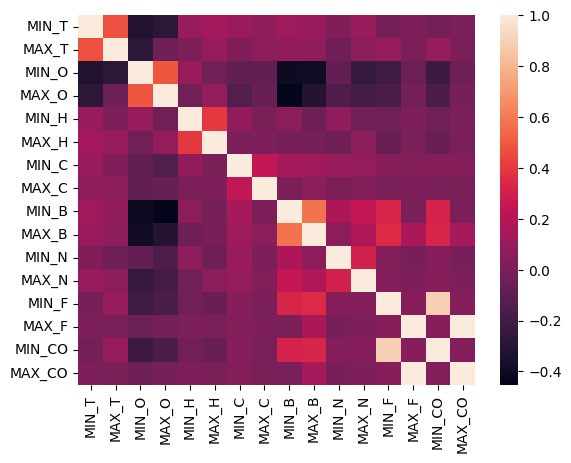

In [15]:
# get the heatmap of correlation matrix for all columns
df1=df.drop(['Station code','srcYear'],axis=1)
corr = df1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)    


# Data Preprocessing 1

## Box plots
##### To figure out the outlier

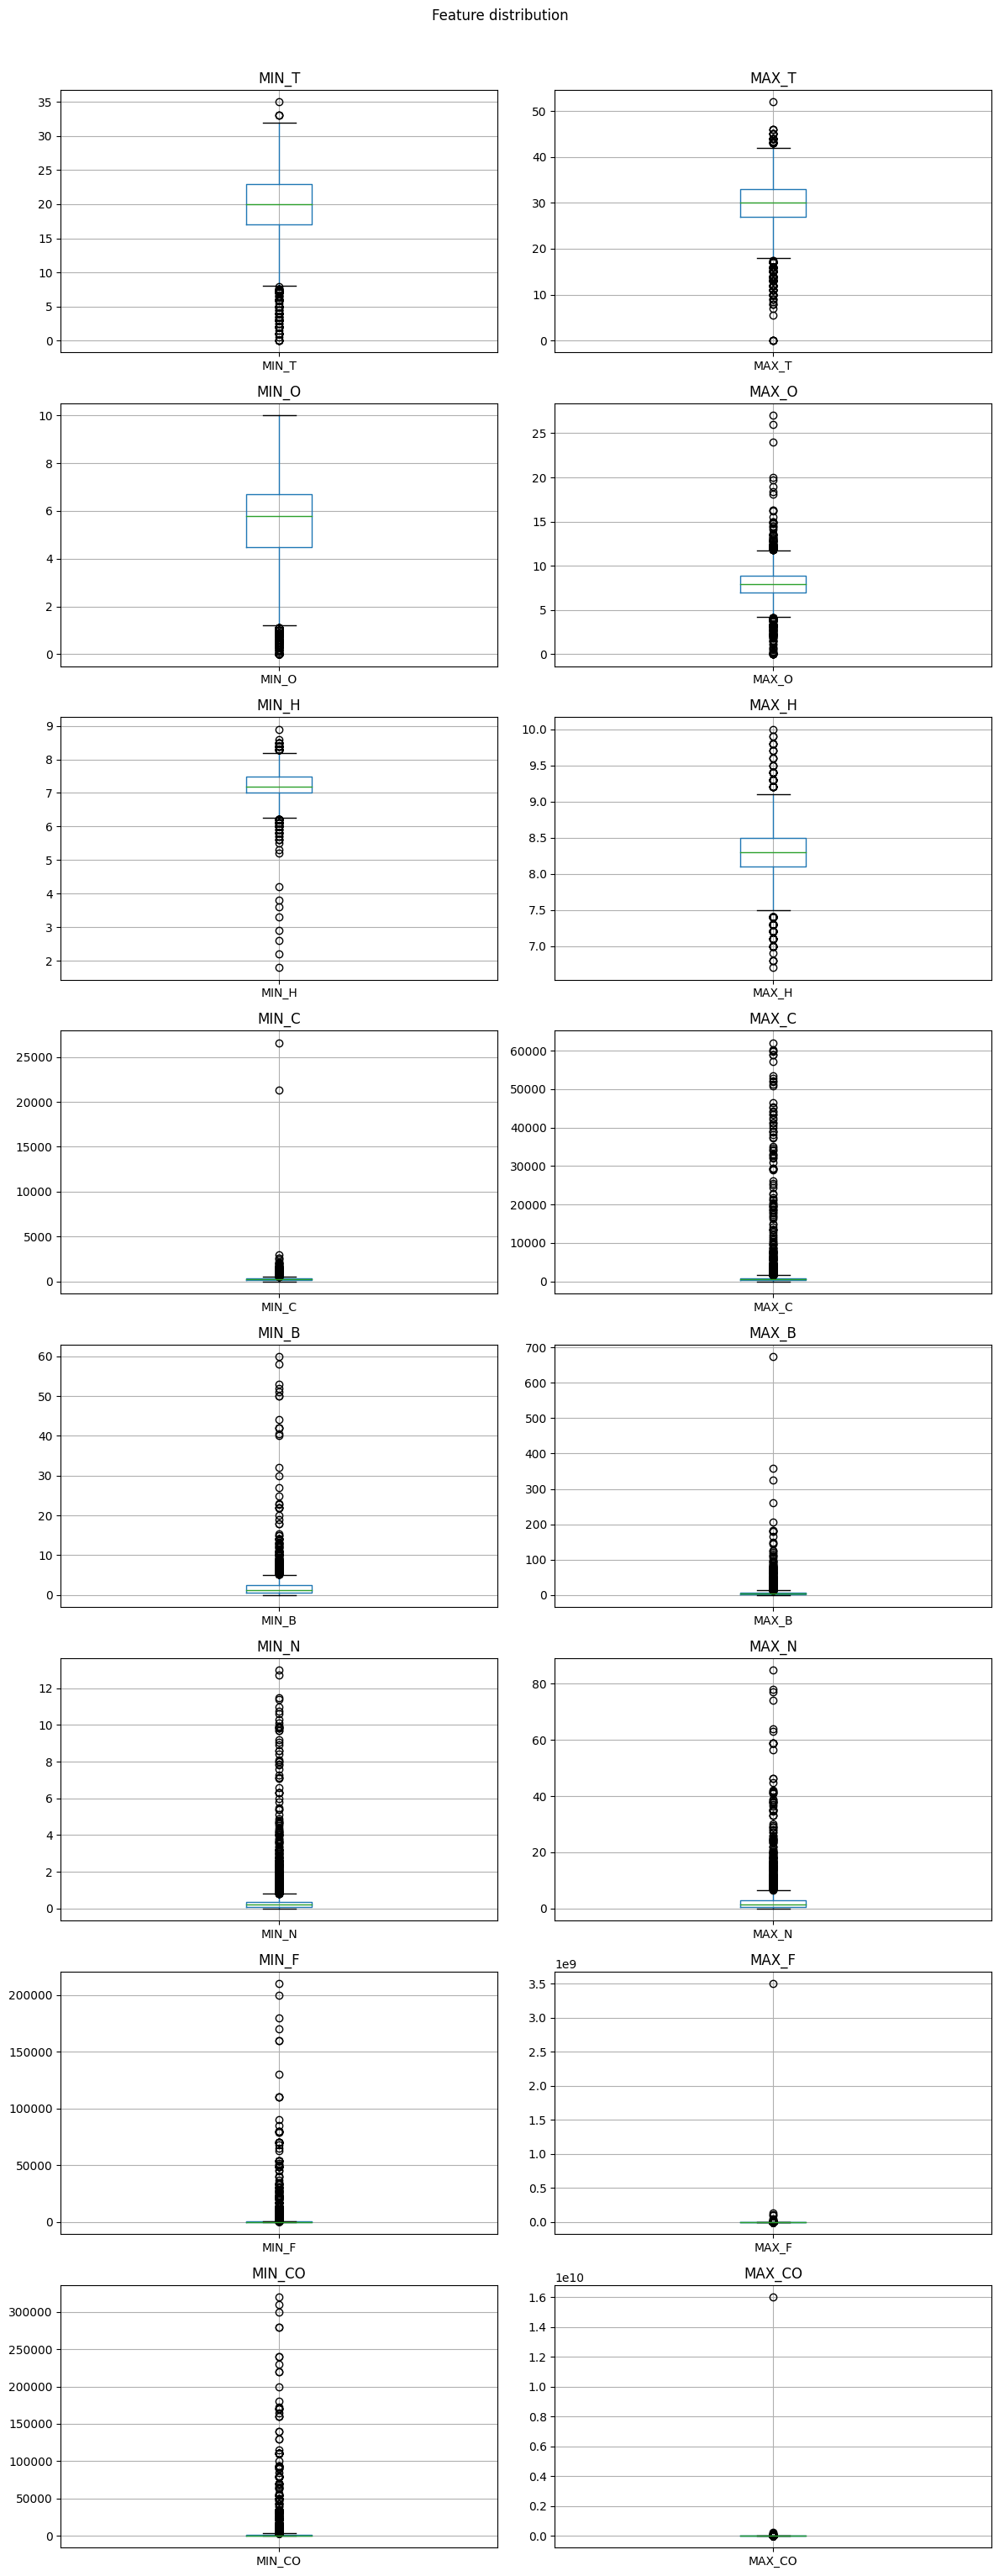

In [16]:
features_to_include = df.columns.tolist()
features_to_include.remove('srcStateName')
features_to_include.remove('Name of the station')
features_to_include.remove('srcYear')
features_to_include.remove('Station code')
features_to_include.remove('Name of river')


fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 30))  # Create a 11x2 grid of subplots

# # Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a boxplot in a separate subplot
for i, feature in enumerate(features_to_include):
    df.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.suptitle('Feature distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

In [17]:
# consider only a subset of rivers
df2=df[df['Name of river'].isin(['GANGA','GODAVARI','CAUVERY','BEAS','SATLUJ','KRISHNA','BRAHMANI','NARMADA','MAHANADI','TUNGABHADRA','YAMUNA'])]
years=[2012,2013,2014,2016,2017,2018,2019]

# drop na
df2=df2.dropna()
df2['srcYear'].value_counts()

2019    315
2018    290
2017    251
2013    234
2016    231
2014    223
2012    204
Name: srcYear, dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_28528\3472650609.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


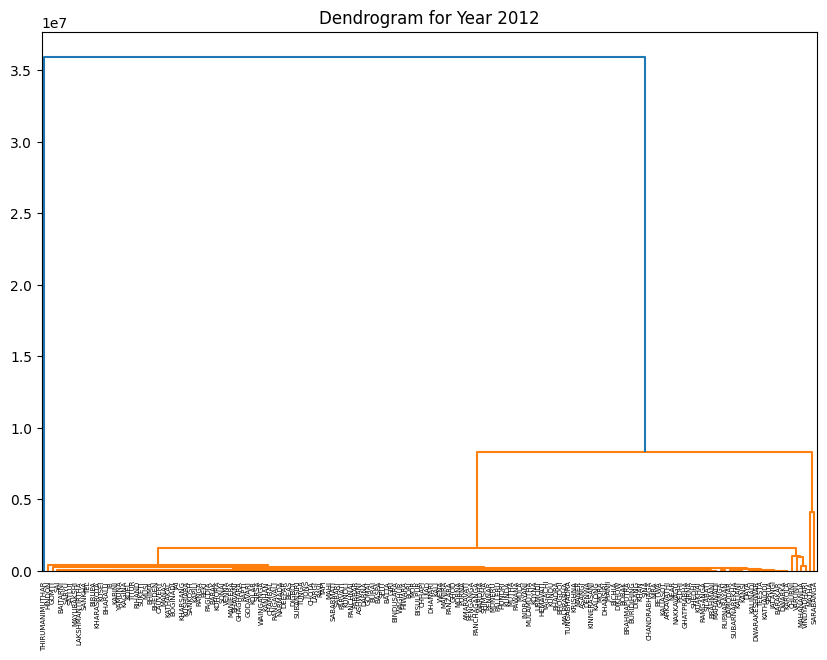

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\3472650609.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


DataFrame for Year 2012:


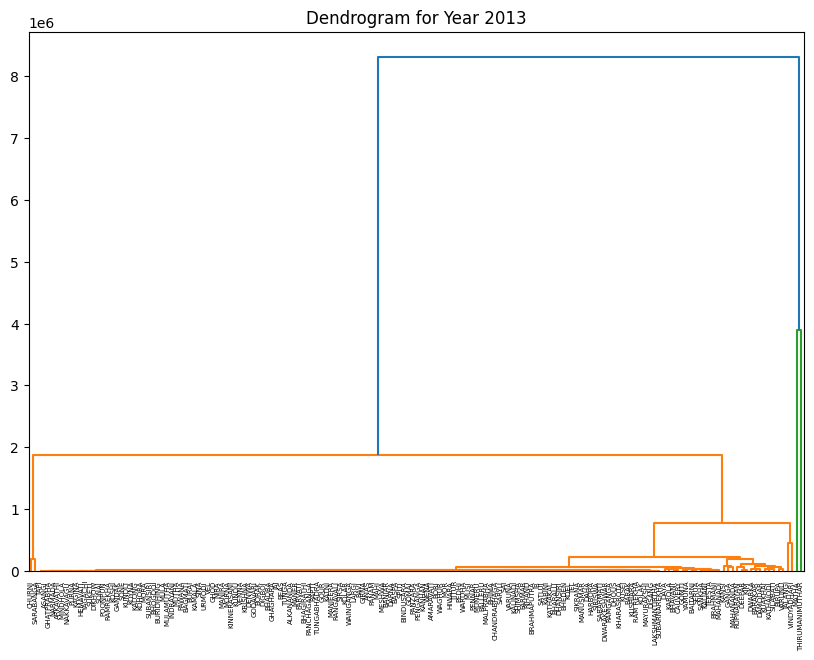

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\3472650609.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


DataFrame for Year 2013:


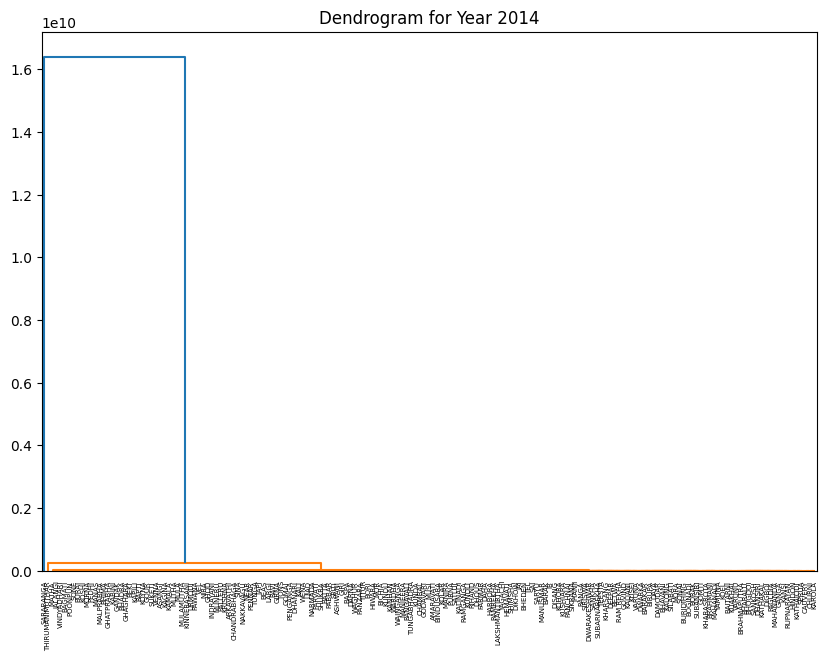

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\3472650609.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


DataFrame for Year 2014:


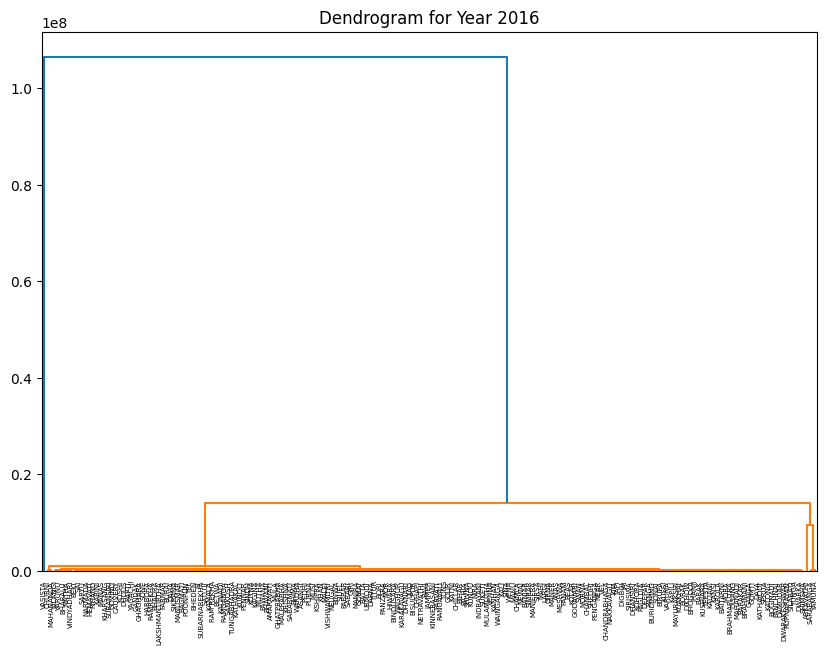

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\3472650609.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


DataFrame for Year 2016:


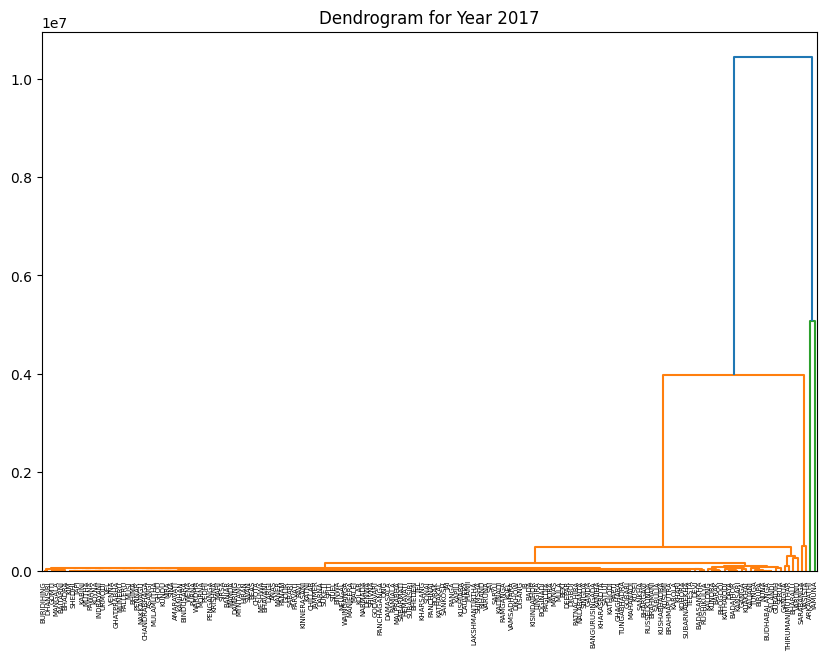

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\3472650609.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


DataFrame for Year 2017:


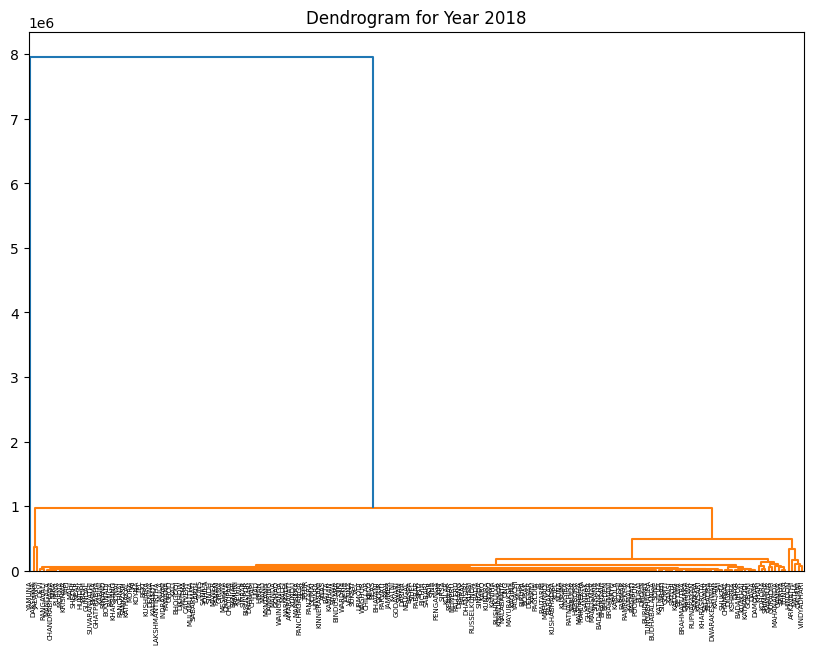

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\3472650609.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


DataFrame for Year 2018:


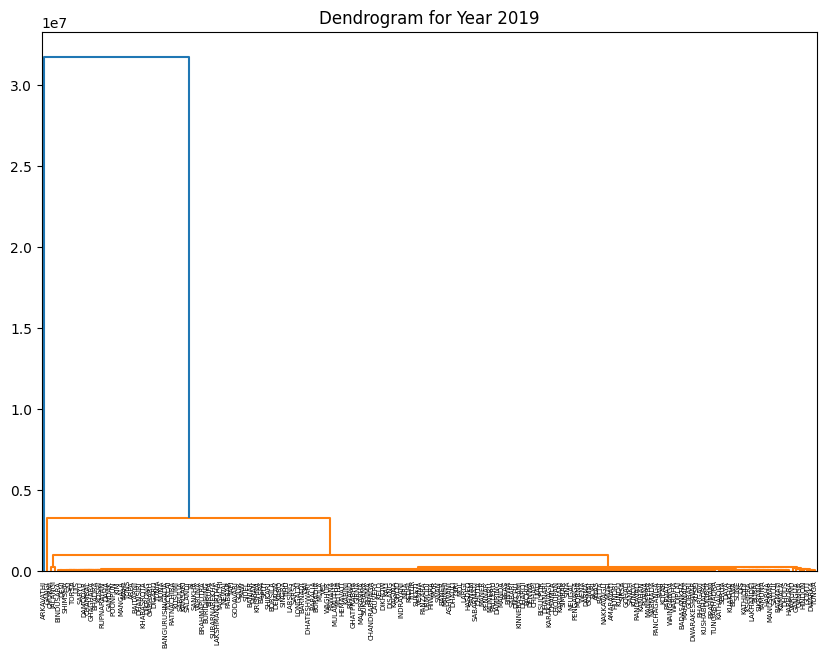

DataFrame for Year 2019:


c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:

# List of years to create dendrograms for
years_list = [2012,2013,2014,2016,2017,2018,2019]

# Loop over the years
for year in years_list:
    # Filter the data for the current year
    df_year = df[df['srcYear'] == year]

    # df_year=df_year[df_year['Name of river'].isin(['YAMUNA','BRAHMAPUTRA','GODAVARI','CAUVERY','BEAS','SATLUJ','KRISHNA','BRAHMANI','NARMADA','MAHANADI','TUNGABHADRA'])]

    # Group the data by 'Name of river' and calculate the mean
    df2 = df_year.groupby('Name of river').mean().reset_index()

    # Select columns of interest
    # df2 = df2[['Name of river', 'MIN_O', 'MAX_H', 'MIN_C','MAX_B','MAX_CO']]

    # Drop rows with missing values
    df2 = df2.dropna()

    # Set 'Name of river' as the index
    df2 = df2.set_index('Name of river')

    # Plot the dendrogram for the current year
    plt.figure(figsize=(10, 7))
    plt.title(f"Dendrogram for Year {year}")
    dend = shc.dendrogram(shc.linkage(df2, method='average'), labels=df2.index, orientation='top', leaf_rotation=90)
    plt.show()

    # Hierarchical clustering for the current year
    cluster = AgglomerativeClustering(n_clusters=66, affinity='manhattan', linkage='average')
    df2['Cluster'] = cluster.fit_predict(df2)

    # Extract cluster assignments and distances
    clusters = shc.fcluster(shc.linkage(df2.drop('Cluster', axis=1), method='average'), t=6, criterion='maxclust')
    df2['Hierarchy'] = clusters

    # Display the DataFrame with cluster assignments and distances for the current year
    print(f"DataFrame for Year {year}:")
    # df2.to_csv('outputb'+str(year)+'.csv')

The below plot explains how horrible is Euclidean distance measure for this data. Who the hell puts Godavari and Yamuna in a close cluster!! Look at BOD and coliform counts!!

C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2949426557.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


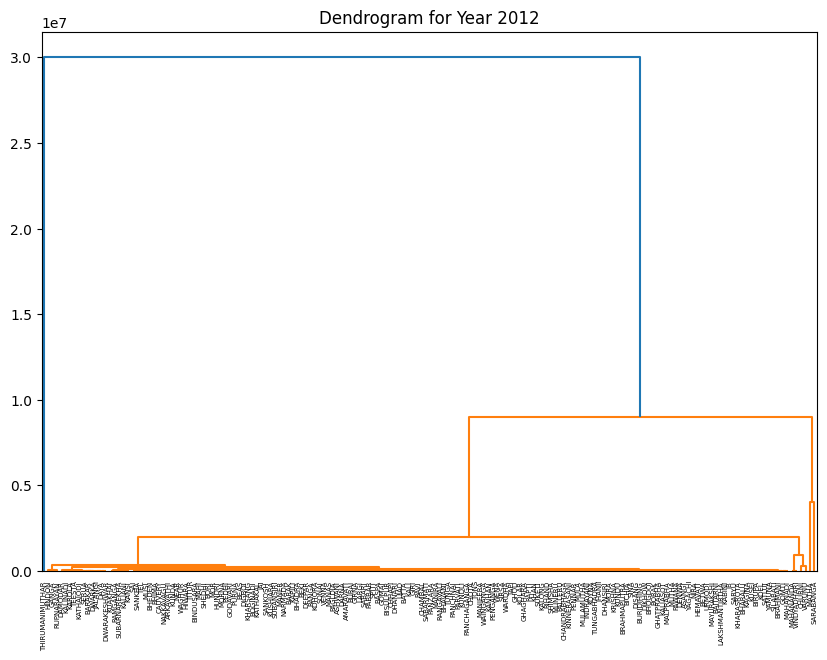

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2949426557.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


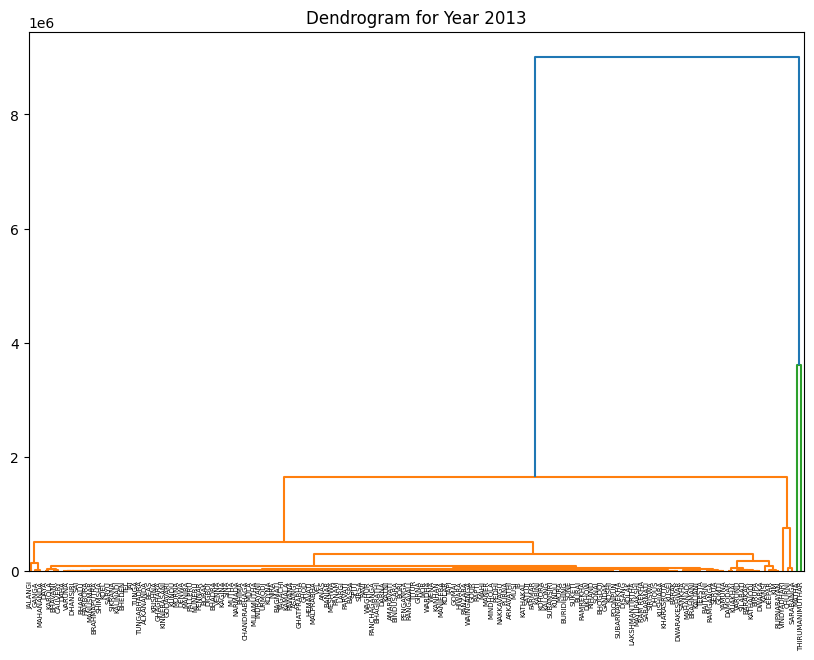

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2949426557.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


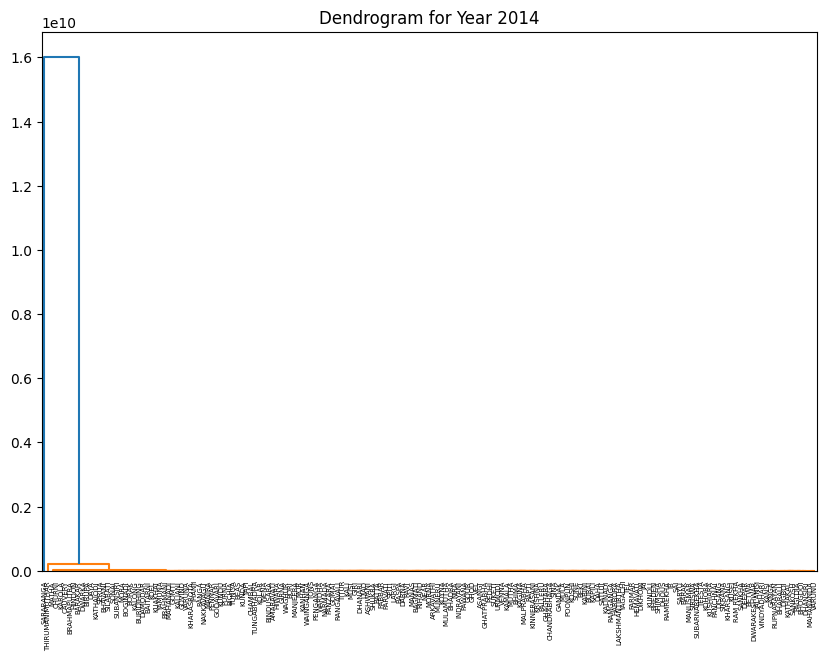

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2949426557.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


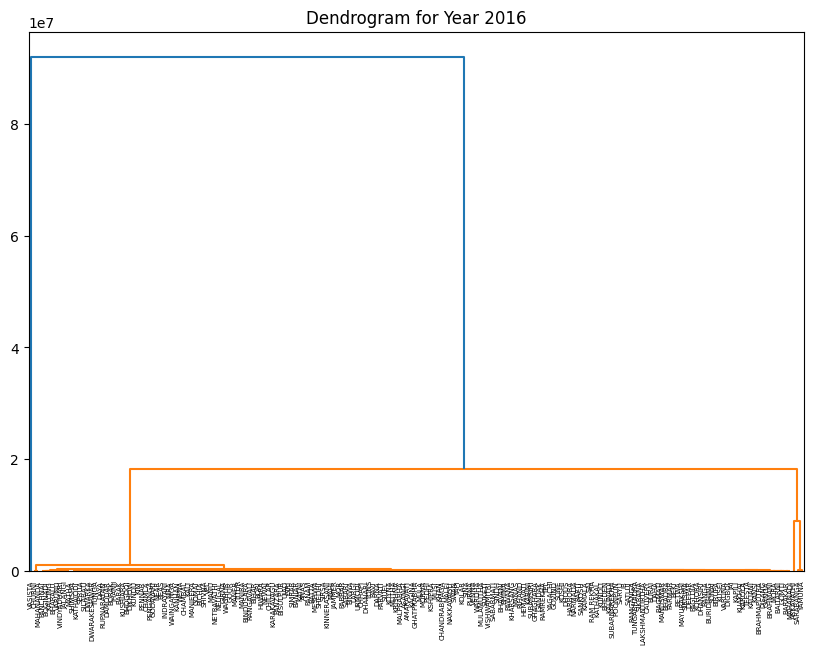

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2949426557.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


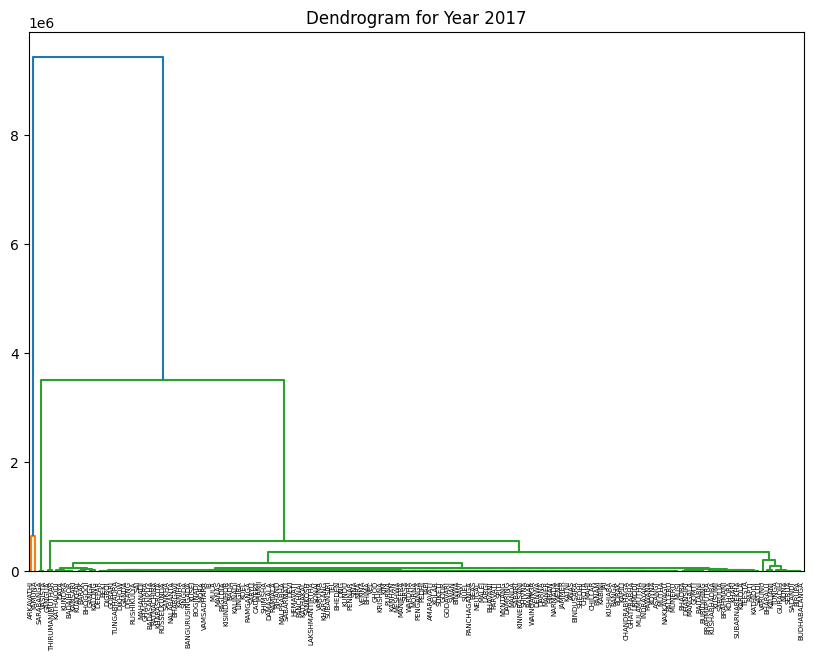

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2949426557.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


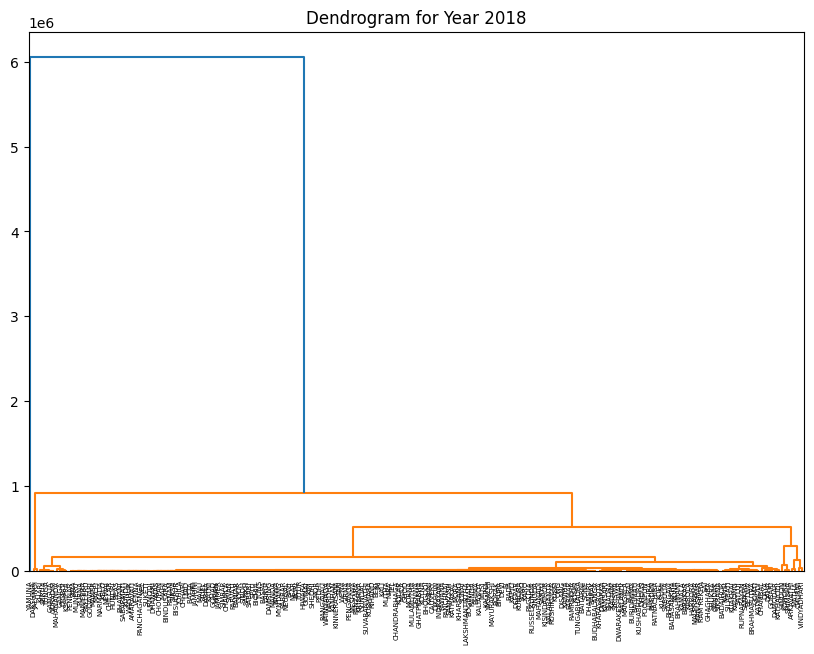

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2949426557.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_year.groupby('Name of river').mean().reset_index()


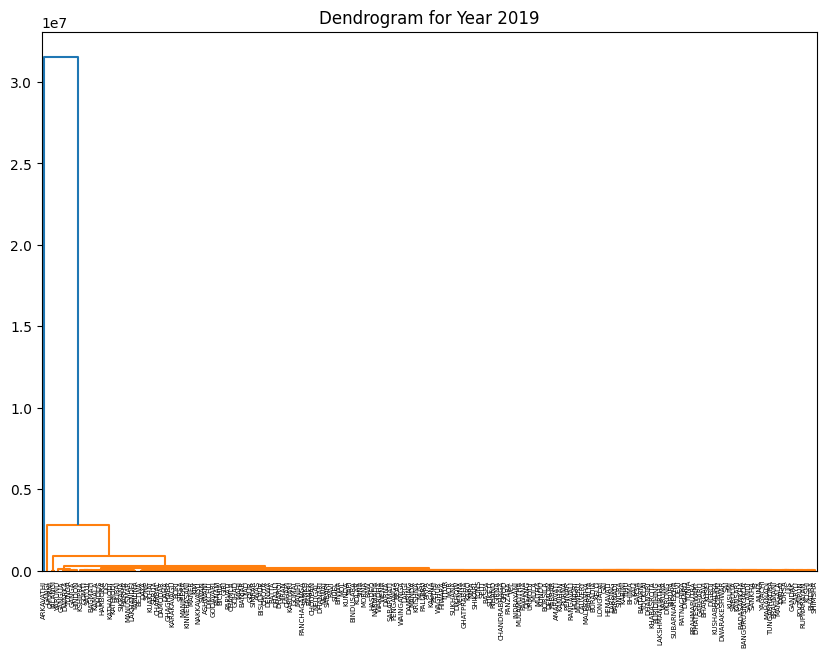

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:

# List of years to create dendrograms for
years_list = [ 2012,2013,2014,2016,2017,2018,2019]

# Loop over the years
for year in years_list:
    # Filter the data for the current year
    df_year = df[df['srcYear'] == year]

    # df_year = df_year[df_year['Name of river'].isin(['YAMUNA','GANGA','GODAVARI','BRAHMAPUTRA', 'CAUVERY', 'BEAS', 'SATLUJ', 'KRISHNA', 'BRAHMANI', 'NARMADA', 'MAHANADI', 'TUNGABHADRA'])]

    # Group the data by 'Name of river' and calculate the mean
    df2 = df_year.groupby('Name of river').mean().reset_index()

    # Select columns of interest
    df2 = df2[['Name of river', 'MAX_B','MIN_O','MAX_H','MIN_C','MAX_CO']]

    # Drop rows with missing values
    df2 = df2.dropna()

    # Set 'Name of river' as the index
    df2_index = df2.set_index('Name of river')

    # Plot the dendrogram for the current year
    plt.figure(figsize=(10, 7))
    plt.title(f"Dendrogram for Year {year}")
    dend = shc.dendrogram(shc.linkage(df2_index, method='complete'), labels=df2_index.index, orientation='top', leaf_rotation=90)
    plt.show()

    # Standardize the data before clustering
    scaler = StandardScaler()
    df2_scaled = pd.DataFrame(scaler.fit_transform(df2.drop(['Name of river'], axis=1)), columns=df2.drop(['Name of river'], axis=1).columns)
    df2_scaled['Name of river'] = df2['Name of river']

    # Hierarchical clustering for the current year
    cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='complete')
    df2_scaled['Cluster'] = cluster.fit_predict(df2_scaled.drop(['Name of river'], axis=1))





C:\Users\PC\AppData\Local\Temp\ipykernel_28528\2633845280.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby(['Name of river']).mean().reset_index()


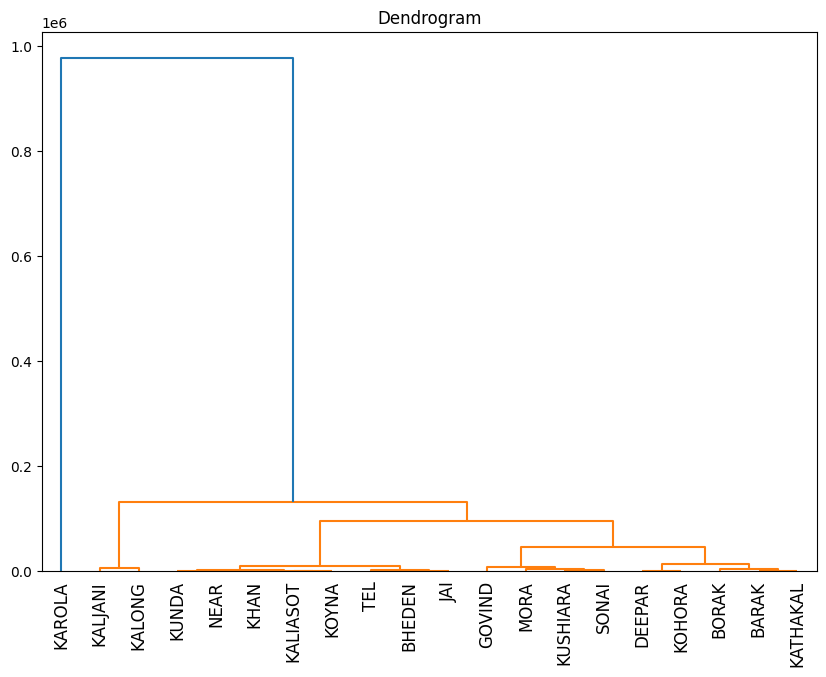

c:\Python 311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [20]:

# Group the data by 'Name of river' and 'srcYear' and calculate the mean
df2 = df.groupby(['Name of river']).mean().reset_index()
df2=df2[df2['srcYear']==2015]

# Select columns of interest
df2 = df2[['Name of river', 'MIN_O', 'MAX_H', 'MIN_C', 'MAX_CO']]

# Drop rows with missing values
df2 = df2.dropna()

# Set 'Name of river' as the index
df2 = df2.set_index('Name of river')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df2, method='ward'), labels=df2.index, orientation='top', leaf_rotation=90)
plt.show()

# Hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
df2['Cluster'] = cluster.fit_predict(df2)

# Extract cluster assignments and distances
clusters = shc.fcluster(shc.linkage(df2.drop('Cluster', axis=1), method='ward'), t=4, criterion='maxclust')
df2['Hierarchy'] = clusters

# Display the DataFrame with cluster assignments and distances



In [21]:
df.to_csv('clustering.csv')